<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Gradients%20et%20extraction%20d'aretes%20sur%20une%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple du calcul de gradients et d'extraction d'arêtes 

Exécuter les 2 lignes suivantes pour colab.

In [2]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 431 (delta 61), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (431/431), 39.06 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/Users/bilgab/INF8770/INF8770


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture de l'image en tons de gris et affichage. Le calcul des gradients sur une image est toujours sur l'image d'intensité.

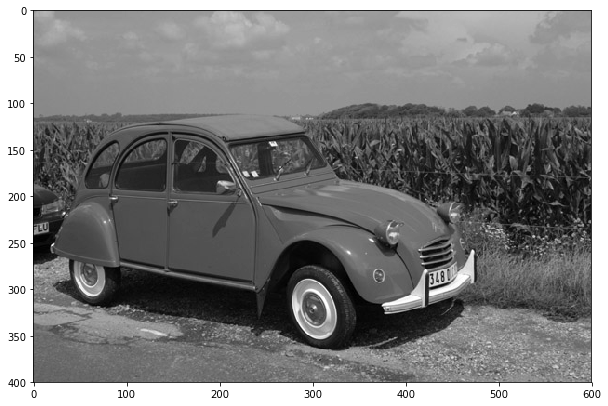

In [4]:
image = cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.show()

Pour faire la convolution avec un filtre de Sobel, il faut ajouter des lignes et colonnes additionnelles pour permettre les calculs aux frontières. Ici, on duplique les valeurs des frontières.

In [5]:
col=image[:,0]
image = np.column_stack((col,image))
col=image[:,len(image[0])-1]
image = np.column_stack((image,col))
row=image[0,:]
image = np.row_stack((row,image))
row=image[len(image)-1,:]
image = np.row_stack((image,row))

Calcul de la convolution avec les filtres de Sobel selon l'axe X et l'axe Y. On peut faire la convolution aussi avec cv2.sobel(). Le calcul sera plus rapide.

In [6]:
Gx = np.zeros((400,600), 'float')
Gy = np.zeros((400,600), 'float')
#Filtres Sobel
Sobelx= [[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]]
Sobely= [[-1.0,-2.0,-1.0],[0.0,0.0,0.0],[1.0,2.0,1.0]]
for row in range(1,len(image)-1):
    for col in range(1,len(image[row])-1):
        for i in range(-1,2):
            for j in range(-1,2):
                #Convolutions. On calcule en X et Y simultanément. 
                Gx[row-1][col-1] += np.multiply(Sobelx[i+1][j+1],image[row-i][col-j])
                Gy[row-1][col-1] += np.multiply(Sobely[i+1][j+1],image[row-i][col-j])

Les gradients peuvent être positifs ou négatifs. Pour l'affichage, on fait la valeur absolue et on normalise les valeurs entre 0 et 255. Affichage pour l'axe X. On détecte bien les lignes verticales, mais pas très bien les lignes horizontales.

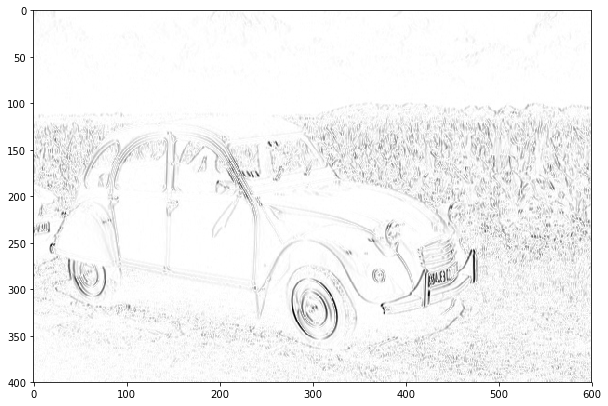

In [7]:
Gxout =  np.absolute(Gx)
Gxout = Gxout * 255/np.max(Gxout)
plt.figure(figsize = (10,10))
plt.imshow(Gxout,cmap = plt.get_cmap('binary'))
plt.show()

Affichage pour l'axe Y. On détecte bien les lignes horizontales. La combinaison des 2 filtres permet de bien détecter les diagonales. 

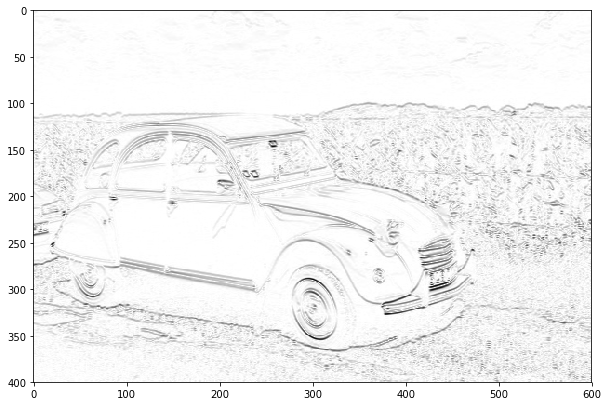

In [8]:
Gyout =  np.absolute(Gy)
Gyout = Gyout * 255/np.max(Gyout)
plt.figure(figsize = (10,10))
plt.imshow(Gyout,cmap = plt.get_cmap('binary'))
plt.show()

Affichage des matrices de gradients. Il y a des valeurs réelles positives et négatives.

In [9]:
print("Gx:", Gx)
print("Gy:", Gy)

Gx: [[  -1.   -5.  -35. ...    0.   -5.   -1.]
 [ -16.  -32.  -45. ...    1.   -6.   -3.]
 [ -32.  -61.  -55. ...    2.   -4.   -3.]
 ...
 [   2.   10.   19. ...   24.   15.   27.]
 [  -6.    2.   26. ...  -67.  -96.   11.]
 [ -16.  -18.   13. ...  -71. -170.  -21.]]
Gy: [[  -5.  -19.  -31. ...    0.   -1.   -3.]
 [ -10.  -38.  -63. ...   -3.   -2.   -3.]
 [ -18.  -35.  -49. ...   -6.   -4.   -1.]
 ...
 [ -22.  -22.   -9. ...  140.   33.   -1.]
 [  22.    6.   -8. ...   57.  -38. -131.]
 [  28.   14.   -5. ...  -33.  -16.  -29.]]


Extraction d'arêtes à partir des gradients. On calcule la force des gradients, et ensuite on seuille la force des gradients calculée.

In [10]:
ForceGradient = np.sqrt(np.power(Gx,2)+np.power(Gy,2))

Gradients plus fort que 80. 

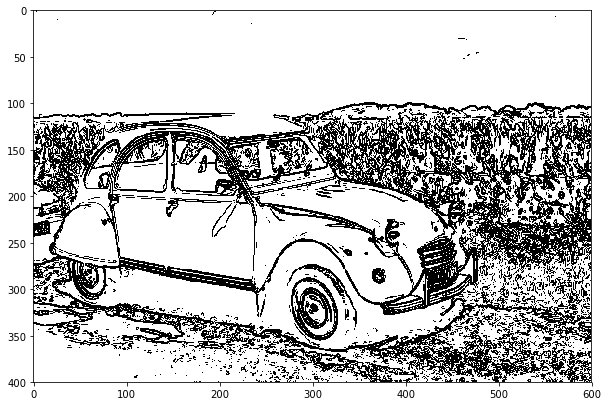

In [11]:
aretes = ForceGradient>80
plt.figure(figsize = (10,10))
plt.imshow(aretes, plt.get_cmap('binary'))
plt.show()

Gradients plus fort que 150. Le seuillage permet d'obtenir différents niveaux de détails. 

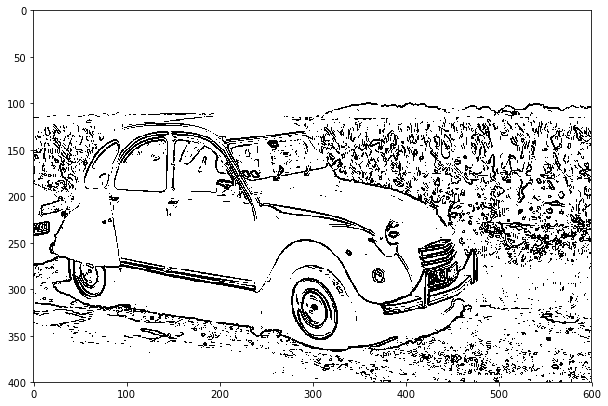

In [12]:
aretes = ForceGradient>150
plt.figure(figsize = (10,10))
plt.imshow(aretes, plt.get_cmap('binary'))
plt.show()